In [1]:
# Information
__author__ = "Mert Can Çakmak"
__version__ = "NLP, Medipol University, April 2021"

In [2]:
# Libraries
import pandas as pd                                            # Used to read dataset and create new dataset in a structural way.
from nltk.tokenize import word_tokenize                        # Used to tokenize the sentences.
import re                                                      # Used to split sentence word by word
import time                                                    # Used to measure computation time
import numpy as np                                             # Used to create numpy arrays
import scipy.spatial.distance                                  # Used to calculate distance between words
from sklearn.decomposition import PCA                          # Used to reduce dimension 
from sklearn.manifold import TSNE                              # Used to reduce dimension
import matplotlib.pyplot as plt                                # Used to plot
from IPython.display import Image                              # Used to show an image
import os.path                                                 # Used to file path check
from sklearn.feature_extraction.text import TfidfVectorizer    # Used to weight dataframe

In [3]:
# Read the excel dataset using read_excel() function from pandas library.
# Since xlrd has explicitly removed support for anything other than xls files,
# openpyxl is used as a additional parameter which is a Python library to read/write Excel xlsx/xlsm/xltx/xltm files.
dataset = pd.read_excel('cleandataset.xlsx', engine='openpyxl')

In [4]:
# Determine the row and column number of the dataset.
dataset_row = dataset.shape[0]
dataset_col = dataset.shape[1]

print("Dataset row    : ", dataset_row)
print("Dataset column : ",dataset_col)

Dataset row    :  1597
Dataset column :  29


In [5]:
# Quick look of the dataset
dataset.head(5)

,job_name,mean_salary,max_salary,min_salary,first_grad,second_grad,third_grad,fourth_grad,fiveth_grad,first_department,...,first_skill,second_skill,third_skill,fourth_skill,fiveth_skill,number_of_entries,job_advertisement,total_participants,male_percentage,female_percentage
0,A Sınıfı İş Güvenliği Uzmanı,4950,2030,7870,Maden Mühendisliği,Makine Mühendisliği,Kimya,Jeoloji Mühendisliği,Çevre Mühendisliği,Çevre,...,AutoCAD,GSM,ISO 14001,ISO 9001,ISO 9001:2000,304,138,1292,73,27
1,AB Proje Asistanı,4110,2250,7380,Uluslararası İlişkiler,İşletme,Siyaset Bilimi ve Kamu Yönetimi,Biyoloji,Sosyoloji,Danışmanlık,...,Adobe Photoshop,Ansys Workbench,AutoCAD,C#,C++,27,0,784,34,66
2,AB Proje Geliştirme Uzmanı,5650,3500,9440,Uluslararası İlişkiler,Makine-Resim-Konstrüksiyon (MYO),İşletme,Çalışma Ekonomisi ve Endüstri İlişkileri,İktisat,Danışmanlık,...,APQP,AutoCAD,ISO 9001:2000,İhracat işlemleri,Maliyet Analizleri,9,0,153,48,51
3,Acente Temsilcisi,3610,2020,6160,İşletme,Turizm ve Seyahat İşletmeciliği (MYO),Seyahat İşletmeciliği,Turizm ve Otel İşletmeciliği (MYO),Seyahat İşletmeciliği ve Turizm Rehberliği,Turizm,...,Maliyet Muhasebesi,Satış Yönetimi,0,0,0,29,2,837,57,43
4,Acil Servis Hemşiresi,2700,2020,3430,İlk ve Acil (Paramedik),Hemşirelik,Hemşirelik ve Sağlık Hizmetleri,Hemşirelik (MYO),Acil Yardım Teknikerliği (MYO),Sağlık,...,İşçi Sağlığı ve İş Güvenliği,Kan Alma,0,0,0,96,4,9500,34,66


In [6]:
# Merging the columns

# Empty list to hold merged columns for each row
merged_words_list = []

# For each row 
for row in range(dataset_row):
    # Merged columns
    merged_words = ""
    # For each column
    for col in range(dataset_col):
        # Take only strings into consideration
        if isinstance(dataset.loc[row][col],str):
            # If string has numbers in it        
            #if any(map(str.isdigit, dataset.loc[row][col])):
                # Replace space with underscore e.g. ISO 9001 with ISO_9001
                #merged_words = merged_words + " " + dataset.loc[row][col].replace(" ", "_")
            #else:
            merged_words = merged_words + " " + dataset.loc[row][col]
    merged_words_list.append(merged_words)        
print(merged_words_list[0:4])

[' A Sınıfı İş Güvenliği Uzmanı Maden Mühendisliği Makine Mühendisliği Kimya Jeoloji Mühendisliği Çevre Mühendisliği Çevre Sağlık Yapı Hizmet Güvenlik Hacettepe Üniversitesi İstanbul Teknik Üniversitesi (İTÜ) Ege Üniversitesi İstanbul Üniversitesi (İÜ) Çukurova Üniversitesi AutoCAD GSM ISO 14001 ISO 9001 ISO 9001:2000', ' AB Proje Asistanı Uluslararası İlişkiler İşletme Siyaset Bilimi ve Kamu Yönetimi Biyoloji Sosyoloji Danışmanlık Eğitim Yapı Topluluklar Hizmet Hacettepe Üniversitesi Anadolu Üniversitesi Orta Doğu Teknik Üniversitesi (ODTÜ) İhsan Doğramacı Bilkent Üniversitesi Ege Üniversitesi Adobe Photoshop Ansys Workbench AutoCAD C# C++', ' AB Proje Geliştirme Uzmanı Uluslararası İlişkiler Makine-Resim-Konstrüksiyon (MYO) İşletme Çalışma Ekonomisi ve Endüstri İlişkileri İktisat Danışmanlık Yapı Eğitim Maden ve Metal Sanayi Taşımacılık Karadeniz Teknik Üniversitesi (KTÜ) Anadolu Üniversitesi Ankara Üniversitesi Ege Üniversitesi Orta Doğu Teknik Üniversitesi (ODTÜ) APQP AutoCAD ISO 9

In [7]:
# Tokenizer
merged_sentences = ""
for sentence in merged_words_list:
    # Join all sentences as one sentence
    merged_sentences = merged_sentences + sentence 
# Tokenizing
tokens = word_tokenize(merged_sentences)
print(tokens[0:50])

['A', 'Sınıfı', 'İş', 'Güvenliği', 'Uzmanı', 'Maden', 'Mühendisliği', 'Makine', 'Mühendisliği', 'Kimya', 'Jeoloji', 'Mühendisliği', 'Çevre', 'Mühendisliği', 'Çevre', 'Sağlık', 'Yapı', 'Hizmet', 'Güvenlik', 'Hacettepe', 'Üniversitesi', 'İstanbul', 'Teknik', 'Üniversitesi', '(', 'İTÜ', ')', 'Ege', 'Üniversitesi', 'İstanbul', 'Üniversitesi', '(', 'İÜ', ')', 'Çukurova', 'Üniversitesi', 'AutoCAD', 'GSM', 'ISO', '14001', 'ISO', '9001', 'ISO', '9001:2000', 'AB', 'Proje', 'Asistanı', 'Uluslararası', 'İlişkiler', 'İşletme']


In [8]:
# Unique tokens
unique_tokens = []
for word in tokens:
    # Select unique tokens
    if word not in unique_tokens:
        unique_tokens.append(word)
        
print(unique_tokens[0:50])
unique_tokens_len = len(unique_tokens)
print("\n Token length: "+str(unique_tokens_len))

['A', 'Sınıfı', 'İş', 'Güvenliği', 'Uzmanı', 'Maden', 'Mühendisliği', 'Makine', 'Kimya', 'Jeoloji', 'Çevre', 'Sağlık', 'Yapı', 'Hizmet', 'Güvenlik', 'Hacettepe', 'Üniversitesi', 'İstanbul', 'Teknik', '(', 'İTÜ', ')', 'Ege', 'İÜ', 'Çukurova', 'AutoCAD', 'GSM', 'ISO', '14001', '9001', '9001:2000', 'AB', 'Proje', 'Asistanı', 'Uluslararası', 'İlişkiler', 'İşletme', 'Siyaset', 'Bilimi', 've', 'Kamu', 'Yönetimi', 'Biyoloji', 'Sosyoloji', 'Danışmanlık', 'Eğitim', 'Topluluklar', 'Anadolu', 'Orta', 'Doğu']

 Token length: 2107


In [9]:
# The sentences are splitted word by word to find the given word inside the sentence 
# because other methods such as (in, find) matches with substring of the word inside the sentence.
# For example the word 'app' and 'apple', it should not match. For this reason, split method is used.
split_sentence = []
for sentence in merged_words_list:
    split_sentence.append(re.split(r'\W', sentence))

In [10]:
# Preallacotion of word_count_list matrix
word_count_list = np.zeros((unique_tokens_len,dataset_row))
print(word_count_list.shape)

(2107, 1597)


In [11]:
# Find how many times the word appeared on the selected sentence.
for index1, word in enumerate(unique_tokens):
    for index2, sentence in enumerate(split_sentence):
        # Find the count number of the word for given sentence
        word_count = sentence.count(word)
        # Add the count to the word-sentence array
        word_count_list[index1][index2] = word_count

In [12]:
# Preallacotion of co-occurance matrix
co_matrix = np.zeros((unique_tokens_len,unique_tokens_len))
# Co-occurance matrix shape
co_matrix.shape

(2107, 2107)

In [13]:
# If created co_matrix exists do not create again.
if os.path.isfile('co_matrix.csv'):
    # Read saved co_matrix from file
    co_matrix_df = pd.read_csv('co_matrix.csv', header = 0, index_col= 0)
    display(co_matrix_df)
else:
    # Fill co occurance matrix
    time1=time.time()
    for word1_index, word1 in enumerate(unique_tokens):
        for word2_index, word2 in enumerate(unique_tokens):
            # How many times the word1 and word2 encounter
            encounter_num = 0
            # Check for each sentence
            for sent_index in range(dataset_row):
                # If word1 appears in the selected sentence
                if word_count_list[word1_index][sent_index] != 0: 
                    if(word1 == word2):
                        # If the words are the same it should be one less encounter
                        encounter_num = encounter_num + word_count_list[word2_index][sent_index]-1
                    else:
                        encounter_num = encounter_num + word_count_list[word2_index][sent_index]
        # Add encounters to co-occurance matrix 
            co_matrix[word2_index][word1_index] = encounter_num
    time2=time.time()
    # Approximately 45 mins to create with i7-8750H CPU
    print(time2-time1, "sec")
    
    # Create co-occurence matrix dataframe to store on the disk and read later
    co_matrix_df=pd.DataFrame(data = co_matrix, columns = unique_tokens, index = unique_tokens)
    # Transform to csv file, show index and header which are words and to show turkish character use utf-8-sig encoding.
    co_matrix_df.to_csv ('co_matrix.csv', index = True, header=True, encoding="utf-8-sig")
    display(co_matrix_df)

,A,Sınıfı,İş,Güvenliği,Uzmanı,Maden,Mühendisliği,Makine,Kimya,Jeoloji,...,Tohumculuk,Responsive,Design,SATIŞ,ODAKLI,Zirai,Zooteknist,Hayvansal,Zumba,Ölçüm
A,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sınıfı,1.0,0.0,3.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
İş,1.0,9.0,57.0,141.0,43.0,61.0,103.0,53.0,56.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Güvenliği,1.0,8.0,139.0,38.0,24.0,47.0,56.0,21.0,43.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uzmanı,1.0,3.0,30.0,15.0,0.0,18.0,116.0,18.0,50.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zirai,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zooteknist,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Hayvansal,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Zumba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Reweighting

# Observed/Expected
def observed_expected(co_matrix_df):
    # Summation of each column
    col_sum = co_matrix_df.sum(axis=0)
    
    # Summation of each cell
    total_sum = col_sum.sum()
    
    # Summation of each row
    row_sum = co_matrix_df.sum(axis=1)
    
    expected = np.outer(row_sum, col_sum) / total_sum
    observed_expected = co_matrix_df / expected
    return observed_expected

# Pointwise Mutual Information (PMI)
def ppmi(co_matrix_df):
    co_matrix_df = observed_expected(co_matrix_df)
    # Ignore log(0) warning:
    with np.errstate(divide='ignore'):
        # Take logarithm
        co_matrix_df = np.log(co_matrix_df)
    # log(0) = 0
    co_matrix_df[np.isinf(co_matrix_df)] = 0.0  
    # If weight is negative, assign 0 
    co_matrix_df[co_matrix_df < 0] = 0.0
    return co_matrix_df

# Find neighbors of the given word from dataframe 
def neighbors(word, co_matrix_df):
    if word not in co_matrix_df.index:
        raise ValueError('{} is not in this dataframe'.format(word))
    # Get word_vector
    word_vector = co_matrix_df.loc[word]
    # Cosine distance is used to calculate distance between words
    dists = co_matrix_df.apply(lambda x: scipy.spatial.distance.cosine(word_vector, x), axis=1)
    return dists.sort_values()

# Latent Semantic Analysis for given dataframe and k dimension
def lsa(co_matrix_df, k):
   
    #The SVD-reduced version of `df` with dimension (m x k), where
    #m is the rowcount of mat and `k` is either the user-supplied
    #k or the column count of `mat`, whichever is smaller.
    
    rowmat, singvals, colmat = np.linalg.svd(co_matrix_df, full_matrices=False)
    # Take diagonal only
    singvals = np.diag(singvals)
    # Truncate
    trunc = np.dot(rowmat[:, 0:k], singvals[0:k, 0:k])
    return pd.DataFrame(trunc, index=co_matrix_df.index)

In [15]:
neighbors("Bilgisayar",co_matrix_df).head()

c:\users\mccak\appdata\local\programs\python\python39\lib\site-packages\scipy\spatial\distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Bilgisayar     0.000000
Programlama    0.044211
HTML           0.045863
CSS            0.054193
Teknolojisi    0.056728
dtype: float64

In [16]:
neighbors("Makine",co_matrix_df).head()

Makine         0.000000
Otomotiv       0.046855
Üretim         0.049571
Endüstriyel    0.050343
Ürünler        0.054734
dtype: float64

In [17]:
neighbors("Acil",co_matrix_df).head()

Acil          0.000000
Paramedik     0.058983
İlk           0.065918
Yardım        0.070648
Hemşirelik    0.071524
dtype: float64

In [18]:
neighbors("Doktor",co_matrix_df).head()

Doktor       0.000000
Tıp          0.186526
Cerrahi      0.209447
Fizik        0.225200
Hekimliği    0.225606
dtype: float64

In [19]:
# PPMI
co_matrix_df_ppmi = ppmi(co_matrix_df)
# If there is NAN value fill with 0
co_matrix_df_ppmi = co_matrix_df_ppmi.fillna(0)
# LSA with k=100
co_matrix_df_lsa  = lsa(co_matrix_df_ppmi, 100)

In [20]:
neighbors("Bilgisayar",co_matrix_df_lsa).head()

c:\users\mccak\appdata\local\programs\python\python39\lib\site-packages\scipy\spatial\distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Bilgisayar     0.000000
Programlama    0.066258
Bilişim        0.155289
ASP            0.224046
Yazılım        0.229450
dtype: float64

In [21]:
neighbors("Makine",co_matrix_df_lsa).head()

Makine         0.000000
Otomotiv       0.167194
Ürünler        0.192217
Üretim         0.195499
Endüstriyel    0.220324
dtype: float64

In [22]:
neighbors("Acil",co_matrix_df_lsa).head()

Acil          0.000000
Paramedik     0.063146
İlk           0.068691
Hemşirelik    0.191632
Yardım        0.222216
dtype: float64

In [23]:
neighbors("Doktor",co_matrix_df_lsa).head()

Doktor      0.000000
Profesör    0.278844
Yrd         0.297541
Doç         0.297541
Doçent      0.297541
dtype: float64

### Additional Work

In [24]:
merged_words_list[0:3]

[' A Sınıfı İş Güvenliği Uzmanı Maden Mühendisliği Makine Mühendisliği Kimya Jeoloji Mühendisliği Çevre Mühendisliği Çevre Sağlık Yapı Hizmet Güvenlik Hacettepe Üniversitesi İstanbul Teknik Üniversitesi (İTÜ) Ege Üniversitesi İstanbul Üniversitesi (İÜ) Çukurova Üniversitesi AutoCAD GSM ISO 14001 ISO 9001 ISO 9001:2000',
 ' AB Proje Asistanı Uluslararası İlişkiler İşletme Siyaset Bilimi ve Kamu Yönetimi Biyoloji Sosyoloji Danışmanlık Eğitim Yapı Topluluklar Hizmet Hacettepe Üniversitesi Anadolu Üniversitesi Orta Doğu Teknik Üniversitesi (ODTÜ) İhsan Doğramacı Bilkent Üniversitesi Ege Üniversitesi Adobe Photoshop Ansys Workbench AutoCAD C# C++',
 ' AB Proje Geliştirme Uzmanı Uluslararası İlişkiler Makine-Resim-Konstrüksiyon (MYO) İşletme Çalışma Ekonomisi ve Endüstri İlişkileri İktisat Danışmanlık Yapı Eğitim Maden ve Metal Sanayi Taşımacılık Karadeniz Teknik Üniversitesi (KTÜ) Anadolu Üniversitesi Ankara Üniversitesi Ege Üniversitesi Orta Doğu Teknik Üniversitesi (ODTÜ) APQP AutoCAD ISO

In [25]:
# Tfidf vectorizer
vect = TfidfVectorizer()
#Learn vocabulary and idf, return document-term matrix.
tfidf = vect.fit_transform(merged_words_list)
# Document similarity with each other
similarity = tfidf * tfidf.T 
print(similarity.shape) 
pd.DataFrame(similarity.toarray())

(1597, 1597)


,0,1,2,3,4,5,6,7,8,9,...,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596
0,1.000000,0.115680,0.293862,0.038566,0.076172,0.127353,0.126127,0.030529,0.176766,0.000000,...,0.105381,0.092198,0.025164,0.263436,0.000000,0.042249,0.101826,0.070818,0.000000,0.101470
1,0.115680,1.000000,0.342265,0.063511,0.069106,0.069888,0.067413,0.000000,0.204484,0.000000,...,0.075475,0.092907,0.000000,0.095140,0.000000,0.080550,0.097716,0.089177,0.000000,0.085114
2,0.293862,0.342265,1.000000,0.098102,0.070178,0.067193,0.065637,0.031345,0.130102,0.089247,...,0.077057,0.064235,0.025837,0.157214,0.000000,0.077591,0.132456,0.087514,0.000000,0.106761
3,0.038566,0.063511,0.098102,1.000000,0.069160,0.117312,0.110014,0.000000,0.048896,0.000000,...,0.100325,0.086013,0.000000,0.126213,0.000000,0.100806,0.052632,0.057580,0.000000,0.050675
4,0.076172,0.069106,0.070178,0.069160,1.000000,0.692414,0.328020,0.000000,0.048925,0.000000,...,0.036123,0.044508,0.082420,0.098766,0.000000,0.059038,0.075711,0.067891,0.000000,0.074767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,0.042249,0.080550,0.077591,0.100806,0.059038,0.059305,0.060201,0.000000,0.041446,0.000000,...,0.047291,0.044310,0.000000,0.049897,0.000000,1.000000,0.582467,0.689666,0.210688,0.654801
1593,0.101826,0.097716,0.132456,0.052632,0.075711,0.063901,0.044921,0.000000,0.097833,0.000000,...,0.045546,0.052647,0.000000,0.065089,0.105806,0.582467,1.000000,0.732782,0.236849,0.827758
1594,0.070818,0.089177,0.087514,0.057580,0.067891,0.067592,0.075432,0.025319,0.062380,0.000000,...,0.037128,0.047901,0.020870,0.063854,0.000000,0.689666,0.732782,1.000000,0.216283,0.818299
1595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.210688,0.236849,0.216283,1.000000,0.239575


In [26]:
arr = similarity.toarray()    
# Fill diagonal with nan value because same documents are always similar each other it returns 1
# When we get maximum similarity between documents 1 would be ignored so it changed with nan value.
np.fill_diagonal(arr, np.nan) 

In [27]:
# Finds similar professions
def find_similar(input_word):
    if not dataset['job_name'].str.contains(input_word).any():
        raise ValueError('{} is not in this dataframe'.format(input_word))
    # Find the document number which has the input word in the dataset 
    for index in dataset.index[dataset['job_name'].str.contains(input_word)]:
        if(dataset['job_name'][index]==input_word):
            found_doc=index
    # 5 most similar document number returned
    result_idx = np.argsort(-arr[found_doc])[0:5]
    for i in range(5):
        # Prints similar professions and similarity value
        print(dataset.loc[result_idx[i]][0], arr[found_doc][result_idx[i]])

In [28]:
find_similar('Biyomedikal Mühendisi')

Biyomedikal Teknikeri 0.608798518229863
Biyomedikal Cihaz Teknikeri 0.5983339018539258
Biyomedikal Uzmanı 0.5640415021325171
Biyomedikal Teknisyeni 0.47481593274579303
Kalibrasyon Uzmanı 0.4017607848446082


In [40]:
find_similar('Makyöz')

Güzellik Uzmanı 0.7075017094647607
Makyaj Uzmanı 0.6950590774453106
Estetisyen 0.6115907905441874
Saç Bakım Uzmanı 0.5726659218203263
Dermokozmetik Uzmanı 0.4904330681411508


In [30]:
find_similar('Avukat')

Hukuk Danışmanı 0.8616143799808504
Stajyer Avukat 0.8105360439923533
Hukuk Müşaviri 0.693735076107715
İcra Avukatı 0.5937756627192352
Avukat Katibi 0.5673306792584822


In [31]:
find_similar('Kaptan')

Deniz Ulaştırma İşletme Mühendisi 0.49772000420185847
Yat Kaptanı 0.48684802307340985
Kamyon Şoförü 0.37812305109579875
Servis Şoförü 0.3750489900202033
Şoför / Sürücü 0.3464508173965614


In [32]:
def tsne_viz(df, colors=None, output_filename=None, figsize=(40, 50), random_state=None):
    # Colors:
    vocab = df.index
    if not colors:
        colors = ['black' for i in vocab]
    # Recommended reduction via PCA or similar:
    n_components = 50 if df.shape[1] >= 50 else df.shape[1]
    dimreduce = PCA(n_components=n_components, random_state=random_state)
    X = dimreduce.fit_transform(df)
    # t-SNE:
    tsne = TSNE(n_components=2, random_state=random_state)
    tsnemat = tsne.fit_transform(X)
    # Plot values:
    xvals = tsnemat[: , 0]
    yvals = tsnemat[: , 1]
    # Plotting:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    ax.plot(xvals, yvals, marker='', linestyle='')
    # Text labels:
    for word, x, y, color in zip(vocab, xvals, yvals, colors):
        try:
            ax.annotate(word, (x, y), fontsize=8, color=color)
        except UnicodeDecodeError:  ## Python 2 won't cooperate!
            pass
    # Output:
    if output_filename:
        plt.savefig(output_filename, bbox_inches='tight')
    else:
        plt.show()

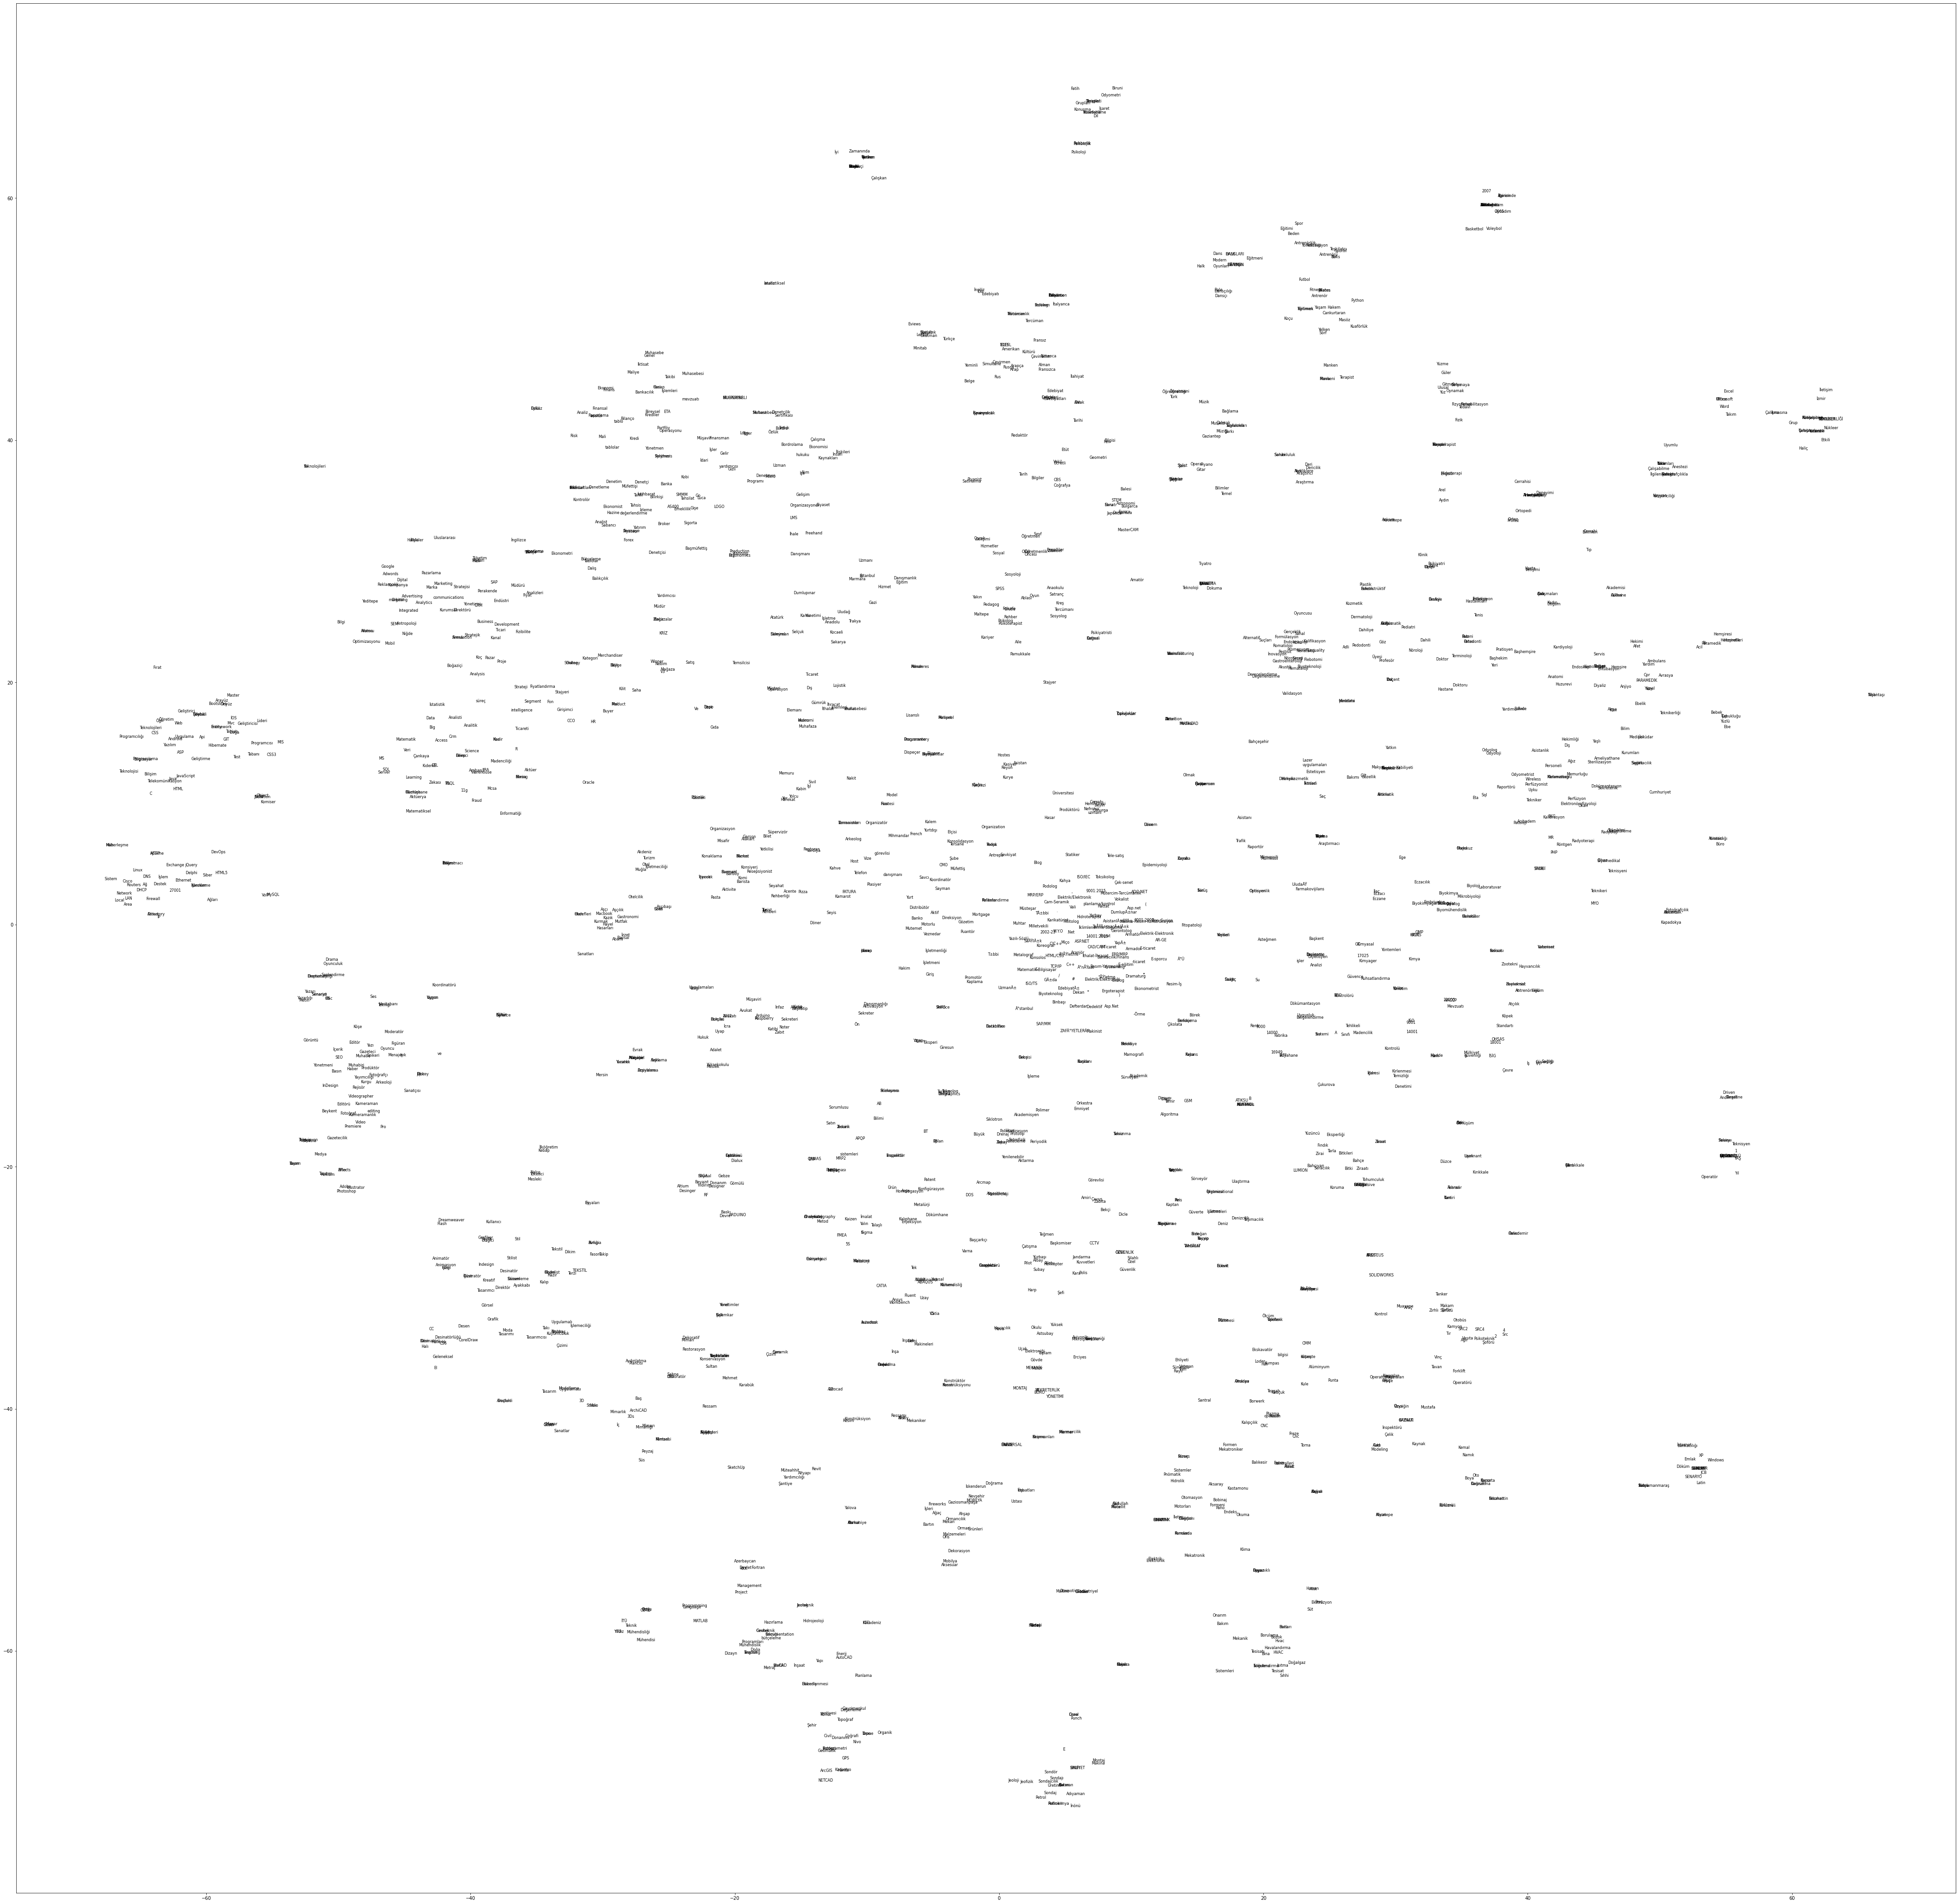

In [41]:
tsne_viz(co_matrix_df_ppmi, None, "pmi_visual.png", (75,75) , random_state=53)

In [34]:
def show(img):
    pil_img = Image(filename=img)
    display(pil_img)

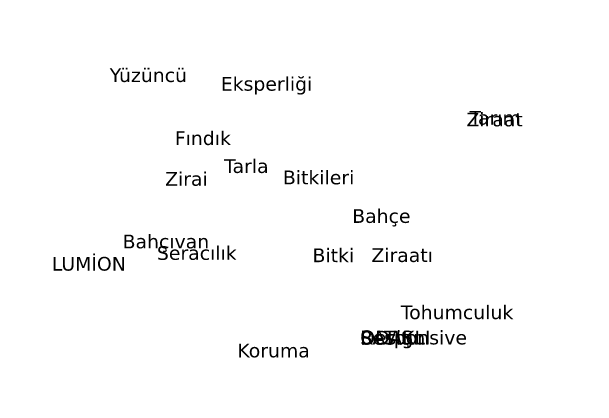

In [35]:
show("example1.png")

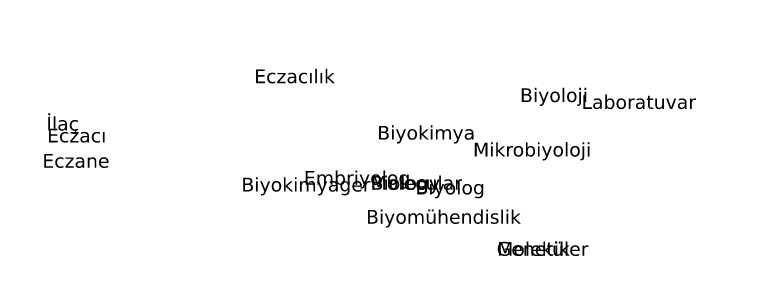

In [36]:
show("example2.png")

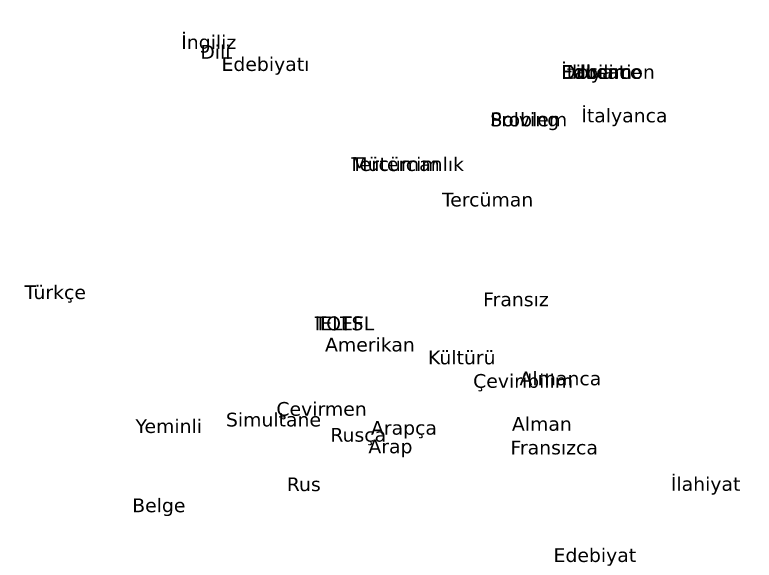

In [37]:
show("example3.png")

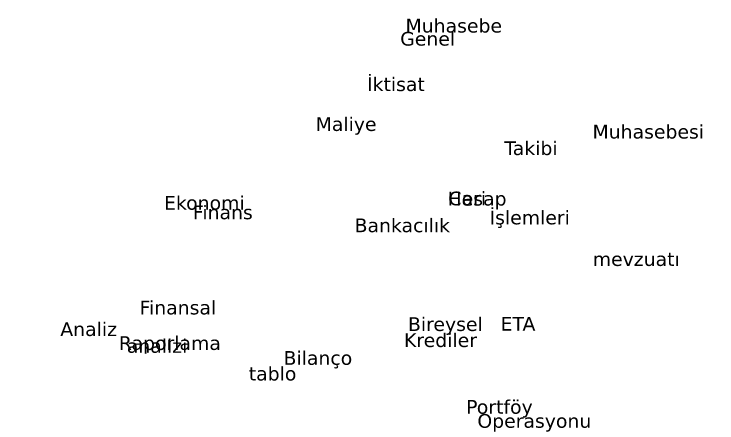

In [38]:
show("example4.png")